In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
import numpy as np
import pandas as pd


from scipy.stats import norm
from scipy.io import loadmat

from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.stats import norm
import multiprocessing as mp
from scipy.fft import fft, ifft, fftshift,ifftshift
from scipy.signal import fftconvolve

In [4]:
time_min=-3
time_max=3
nx = 500000

time =np.arange(time_min,time_max,(time_max-time_min)/(nx-1))

currents = np.linspace(100,500,5)

tIndex = np.intersect1d(np.where(time*1e3>0),np.where(time*1e3<10))

In [5]:
def getDiameters():
    
   
    minDiam = .1
    maxDiam = 15
    
    d = np.linspace(minDiam,maxDiam,2000)*1e-6

    return d

d = getDiameters()  

In [6]:
binSizeSamples = np.diff(d)[0]

In [7]:
binSizeSamples/8.51063829787236e-08

0.0875812906453224

In [8]:
fascIdx = 0

phi = pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_LowPerineurium/'+str(fascIdx)+'_BetterConductivity.xlsx')
phi2 = pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity/'+str(fascIdx)+'_BetterConductivity.xlsx')
    

<IPython.core.display.Javascript object>


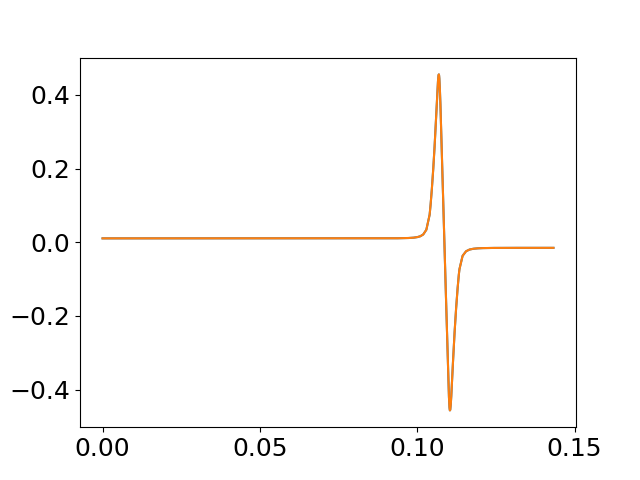

In [9]:
plt.figure()
plt.plot(phi.iloc[:,0],phi.iloc[:,1])
plt.plot(phi2.iloc[:,0],phi2.iloc[:,1])

In [7]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Analytic_allActive_squareTerm/'
outputfolderS = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Analytic_allActive_squareTerm_downward/'

distanceIdx = 1
iteration = 0 

In [8]:
maff7 = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals.npy')[np.newaxis]
meff7 = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals.npy')[np.newaxis]
# uaff7 = np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals.npy')[np.newaxis]
# ueff7 = np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(distanceIdx)+'/signals.npy')[np.newaxis]

maff7S = np.load(outputfolderS+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals.npy')[np.newaxis]
meff7S = np.load(outputfolderS+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals.npy')[np.newaxis]

In [9]:
maffAll = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    maffAll = np.vstack((maffAll,np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    
maffAllS = np.load(outputfolderS+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    maffAllS = np.vstack((maffAllS,np.load(outputfolderS+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    

In [10]:
meffAll = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    meffAll = np.vstack((meffAll,np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

meffAllS = np.load(outputfolderS+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    meffAllS = np.vstack((meffAllS,np.load(outputfolderS+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    


In [11]:
uaffAll = np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    uaffAll = np.vstack((uaffAll,np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

uaffAllS = np.load(outputfolderS+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    uaffAllS = np.vstack((uaffAllS,np.load(outputfolderS+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    
ueffAll = np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    ueffAll = np.vstack((ueffAll,np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

ueffAllS = np.load(outputfolderS+'/'+str(iteration)+'/ueff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    ueffAllS = np.vstack((ueffAllS,np.load(outputfolderS+'/'+str(iteration)+'/ueff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    


In [12]:
totalAll = maffAll + meffAll+ uaffAll + ueffAll
totalAllS = maffAllS + meffAllS# + uaffAllS + ueffAllS

In [13]:
numFibers = []
for i in range(39):
    numFibers.append(np.load(outputfolder+'/'+str(iteration)+'/fascicles/fibers'+str(i)+'.npy'))
    

In [14]:
probs = []
for i in range(39):
    probs.append(np.load(outputfolder+'/'+str(iteration)+'/fascicles/probs'+str(i)+'.npy',allow_pickle=True))
    
maffProbs = np.array(probs)[:,0]
meffProbs = np.array(probs)[:,1]
uaffProbs = np.array(probs)[:,2]
ueffProbs = np.array(probs)[:,3]

In [15]:
dist = []
for i in range(39):
    dist.append(np.load(outputfolder+'/'+str(iteration)+'/fascicles/probDist'+str(i)+'.npy',allow_pickle=True))
    

In [16]:
recruitment = []
for i in range(39):
    recruitment.append(np.load(outputfolder+'/'+str(iteration)+'/recruitment/recruitment_'+str(i)+'.npy',allow_pickle=True))
    

In [17]:
recruitmentS = []
for i in range(39):
    recruitmentS.append(np.load(outputfolderS+'/'+str(iteration)+'/recruitment/recruitment_'+str(i)+'.npy',allow_pickle=True))
    

In [18]:
scaling = []
for i in range(39):
    scaling.append(np.load(outputfolder+'/'+str(iteration)+'/diameters/scaling_'+str(i)+'.npy',allow_pickle=True))
    

In [19]:
maffWeight = []
for i in range(39):
    maffWeight.append(np.load(outputfolder+'/'+str(iteration)+'/maff/1/scaling_'+str(i)+'.npy',allow_pickle=True))

meffWeight = []
for i in range(39):
    meffWeight.append(np.load(outputfolder+'/'+str(iteration)+'/meff/1/scaling_'+str(i)+'.npy',allow_pickle=True))
    
maffWeightS = []
for i in range(39):
    maffWeightS.append(np.load(outputfolderS+'/'+str(iteration)+'/maff/1/scaling_'+str(i)+'.npy',allow_pickle=True))

meffWeightS = []
for i in range(39):
    meffWeightS.append(np.load(outputfolderS+'/'+str(iteration)+'/meff/1/scaling_'+str(i)+'.npy',allow_pickle=True))
    

In [20]:
phiMaff = []
phiMeff = []
for i in range(39):
    phis = np.load(outputfolder+'/'+str(0)+'/'+'phis/'+str(i)+'.npy',allow_pickle=True)
    phiMaff.append(phis[0])
    phiMeff.append(phis[1])
    
phiMaffS = []
phiMeffS = []
for i in range(39):
    phis = np.load(outputfolderS+'/'+str(0)+'/'+'phis/'+str(i)+'.npy',allow_pickle=True)
    phiMaffS.append(phis[0])
    phiMeffS.append(phis[1])

In [21]:
phiMaff = np.array(phiMaff)
phiMeff = np.array(phiMeff)

phiMaffS = np.array(phiMaffS)
phiMeffS = np.array(phiMeffS)

In [22]:
fascIdx = 0

phiRaw = [np.load(outputfolder + '/' + str(0)+'/'+'phis/rawShapes_'+str(fascIdx)+'.npy')]

for fascIdx in np.arange(1,3):
    
    phiRaw.append(np.load(outputfolder + '/' + str(0)+'/'+'phis/rawShapes_'+str(fascIdx)+'.npy'))
    


<IPython.core.display.Javascript object>


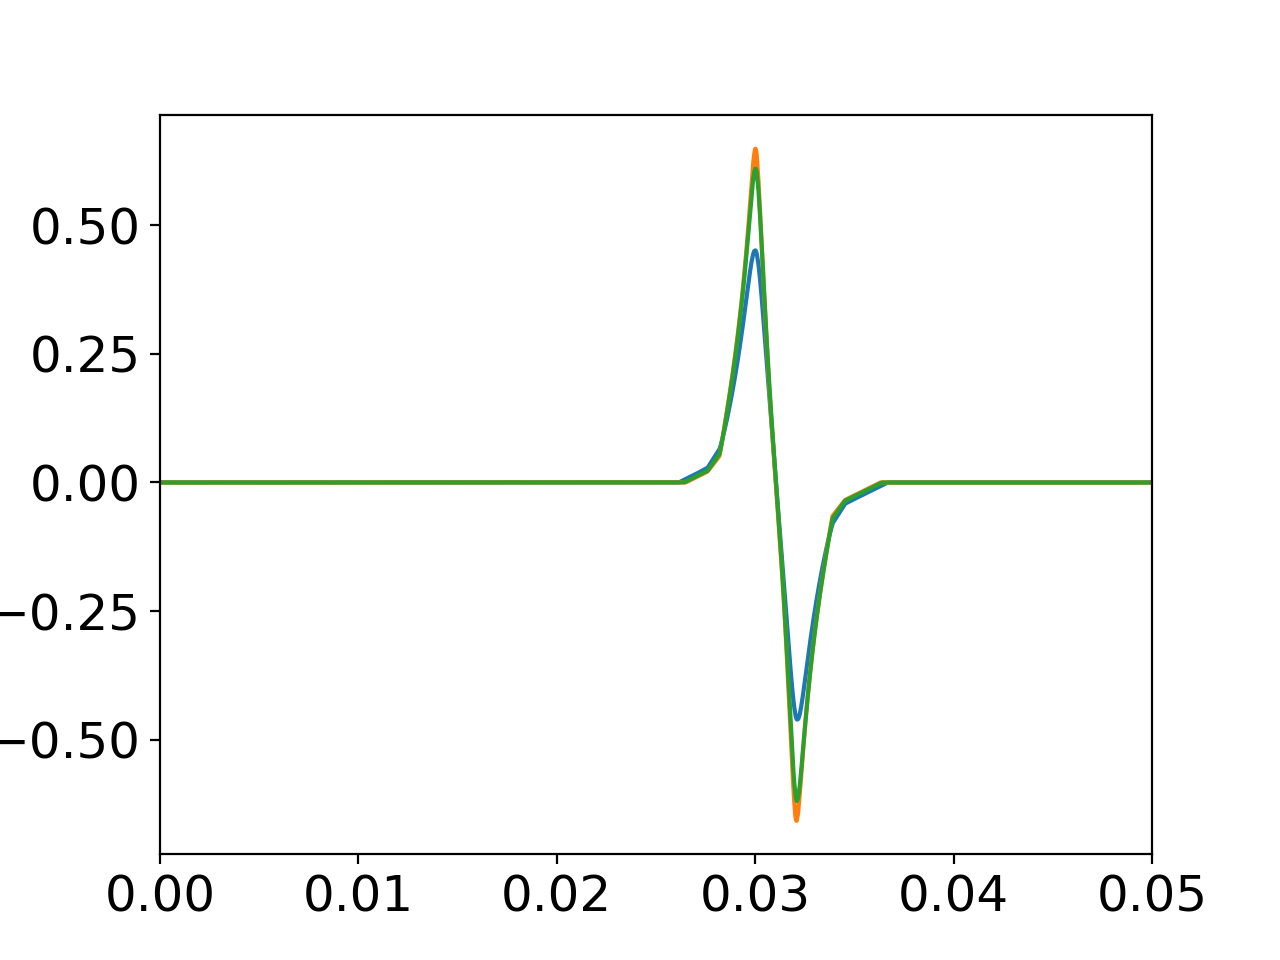

(0.0, 0.05)

In [23]:
plt.figure()
plt.plot(time,phiRaw[0][0,i,:])
plt.plot(time,phiRaw[1][0,i,:])
plt.plot(time,phiRaw[2][0,i,:])
plt.xlim([0,.05])

<IPython.core.display.Javascript object>


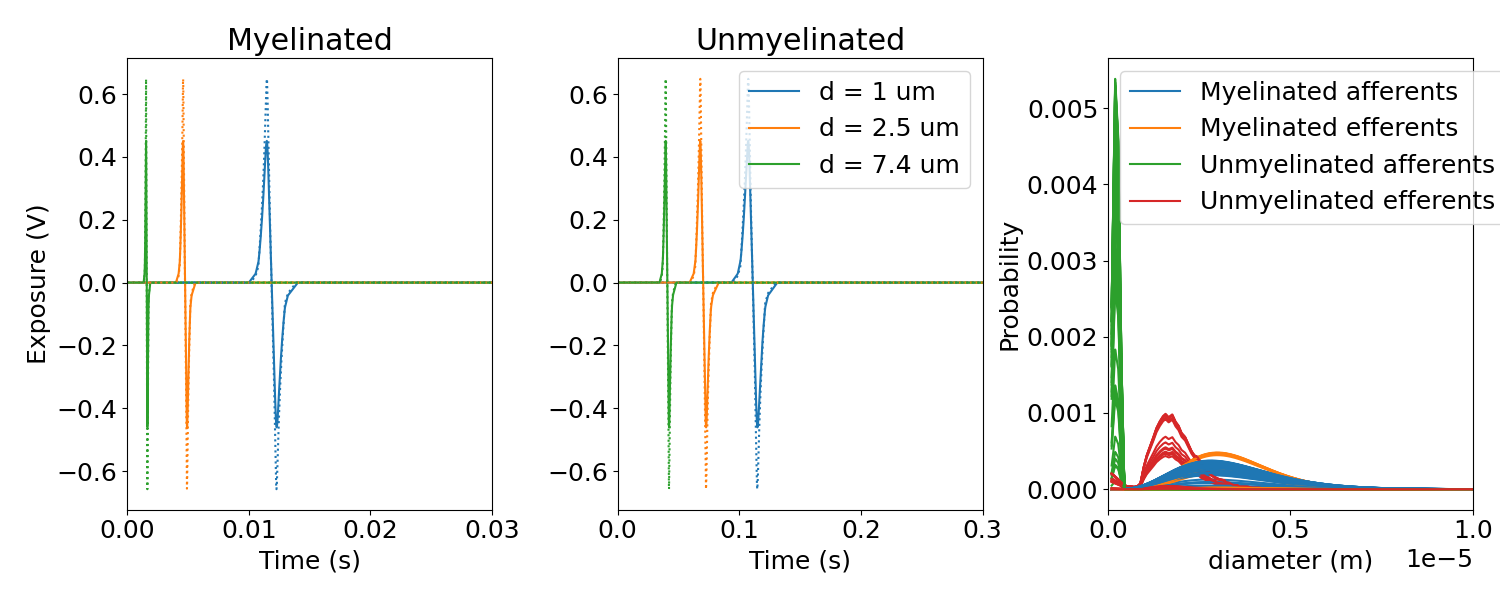

/gpfs/bbp.cscs.ch/home/tharayil/bluepy-env/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/gpfs/bbp.cscs.ch/home/tharayil/bluepy-env/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [37]:
selectedDiameters = [1, 2.5, 7.4]

selectedIndex = []
legend = []
for diam in selectedDiameters:
    selectedIndex.append(np.argmin(np.abs(diam*1e-6-d)))
    legend.append('d = '+str(diam)+ ' um')

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)

fmt = ['-',':','.-']

for fasc in range(2):

    for i in selectedIndex:

        plt.plot(time,phiRaw[fasc][0,i,:],fmt[fasc])
    
    plt.gca().set_prop_cycle(None)



# plt.ylim([-0.5,0.5])
plt.xlim([0,.03])

plt.ylabel('Exposure (V)')
plt.title('Myelinated')
plt.xlabel('Time (s)')

plt.subplot(1,3,2)

for fasc in range(2):

    for i in selectedIndex:

        plt.plot(time,phiRaw[fasc][1,i,:],fmt[fasc])
        
    plt.gca().set_prop_cycle(None)
    
# plt.ylim([-0.5,0.5])
plt.xlim([0,.3])

plt.legend(legend)

plt.title('Unmyelinated')
plt.xlabel('Time (s)')

plt.tight_layout()

plt.subplot(1,3,3)

for i in range(39):
    plt.plot(d,dist[i][0],c='tab:blue')
    plt.plot(d,dist[i][1],c='tab:orange')
    plt.plot(d,dist[i][2],c='tab:green')
    plt.plot(d,dist[i][3],c='tab:red')

plt.legend(['Myelinated afferents','Myelinated efferents','Unmyelinated afferents','Unmyelinated efferents'])
plt.xlim([0,1e-5])
plt.xlabel('diameter (m)')
plt.ylabel('Probability')

plt.savefig('figures/phiRaw.png',dpi=300)

<IPython.core.display.Javascript object>


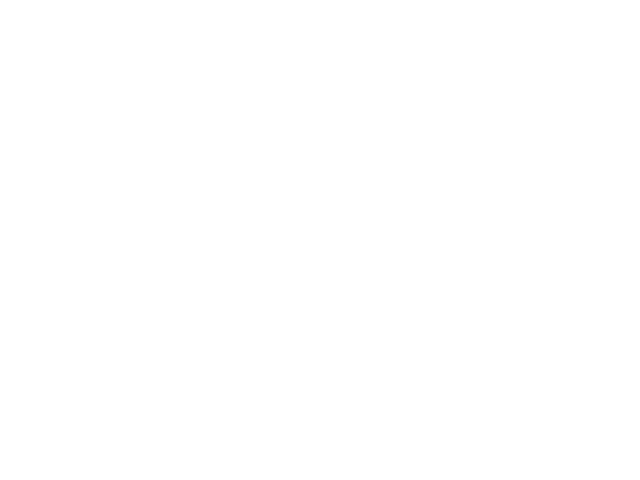

(array([25.,  0.,  0.,  0.,  4.,  2.,  2.,  0.,  0.,  6.]),
 array([1.19140702e-06, 1.84170895e-02, 3.68329876e-02, 5.52488858e-02,
        7.36647839e-02, 9.20806820e-02, 1.10496580e-01, 1.28912478e-01,
        1.47328376e-01, 1.65744274e-01, 1.84160173e-01]),
 <BarContainer object of 10 artists>)

In [23]:
plt.figure()
plt.hist(maffProbs)
plt.hist(meffProbs)

In [50]:
len(scaling[0])

2

<IPython.core.display.Javascript object>


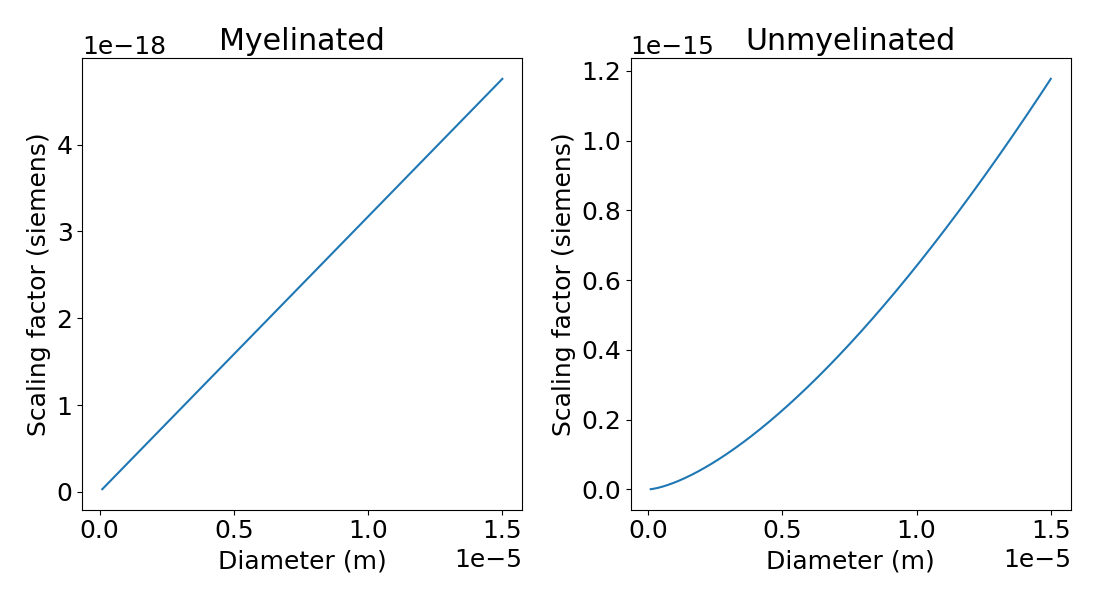

In [32]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(d,scaling[0][0])
plt.xlabel('Diameter (m)')
plt.ylabel('Scaling factor (siemens)')
plt.title('Myelinated')

plt.subplot(1,2,2)

plt.plot(d,scaling[0][1])
plt.xlabel('Diameter (m)')
plt.ylabel('Scaling factor (siemens)')
plt.title('Unmyelinated')

plt.tight_layout()
plt.savefig('figures/scaling.png',dpi=300)

<IPython.core.display.Javascript object>


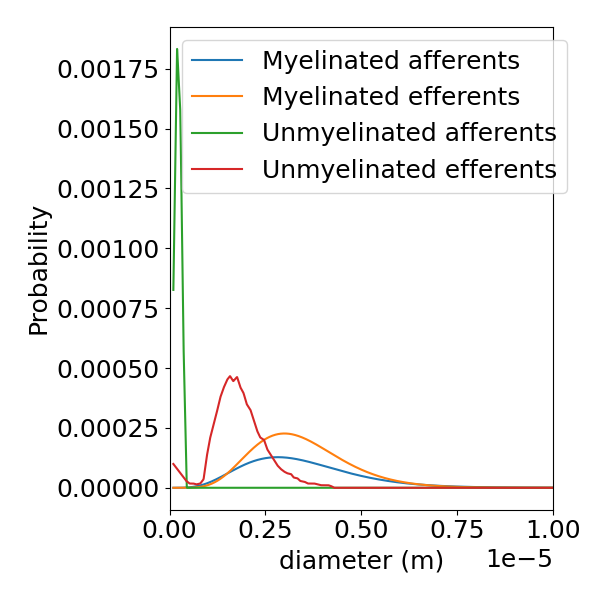

In [33]:
plt.figure(figsize=(6,6))

for i in range(1):
    plt.plot(d,dist[i][0],c='tab:blue')
    plt.plot(d,dist[i][1],c='tab:orange')
    plt.plot(d,dist[i][2],c='tab:green')
    plt.plot(d,dist[i][3],c='tab:red')

plt.legend(['Myelinated afferents','Myelinated efferents','Unmyelinated afferents','Unmyelinated efferents'])
plt.xlim([0,1e-5])
plt.xlabel('diameter (m)')
plt.ylabel('Probability')
plt.tight_layout()

plt.savefig('figures/diameters.png',dpi=300)

<IPython.core.display.Javascript object>


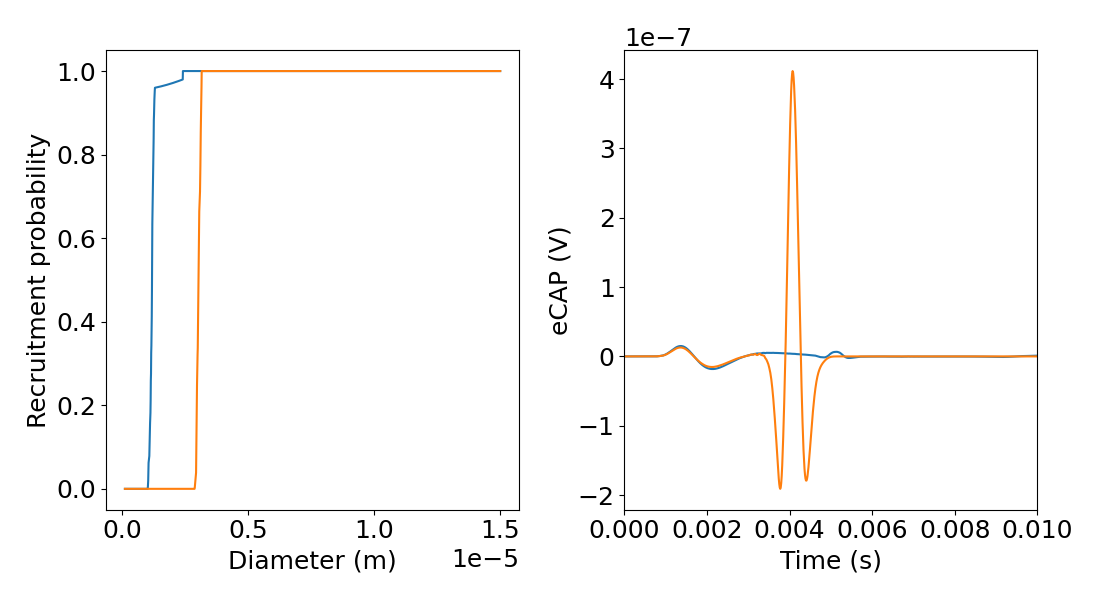

In [34]:
selectedFascicles = [28,17]

plt.figure(figsize=(11,6))

plt.subplot(121)

for s in selectedFascicles:
    
    plt.plot(d,recruitment[s][-1][0])

plt.xlabel('Diameter (m)')
plt.ylabel('Recruitment probability')

plt.subplot(122)

for s in selectedFascicles:
    
    plt.plot(time[1:-1],totalAll[s][-1])
    
plt.xlabel('Time (s)')
plt.ylabel('eCAP (V)')

plt.xlim([0,10e-3])

plt.tight_layout()

plt.savefig('figures/fascicles.png',dpi=300)


<IPython.core.display.Javascript object>


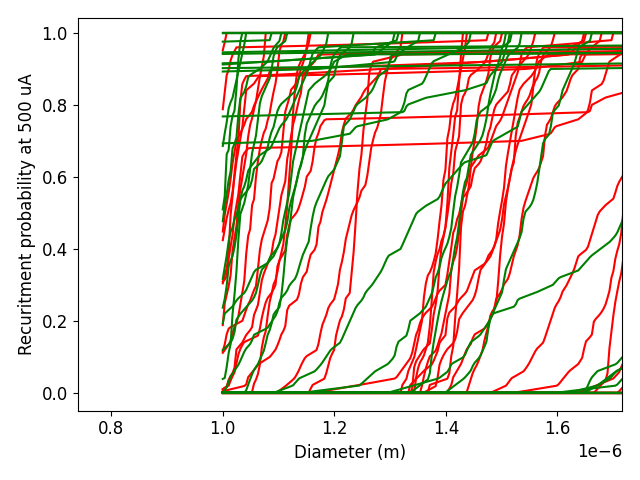

In [48]:
plt.figure()

legend = []

for i in range(39):
    plt.plot(d,recruitment[i][-1][0],c='r')
    

for i in range(39):
    plt.plot(d,recruitmentS[i][-1][0],c='g')
    
plt.xlabel('Diameter (m)')
plt.ylabel('Recuritment probability at 500 uA')
plt.tight_layout()

<IPython.core.display.Javascript object>


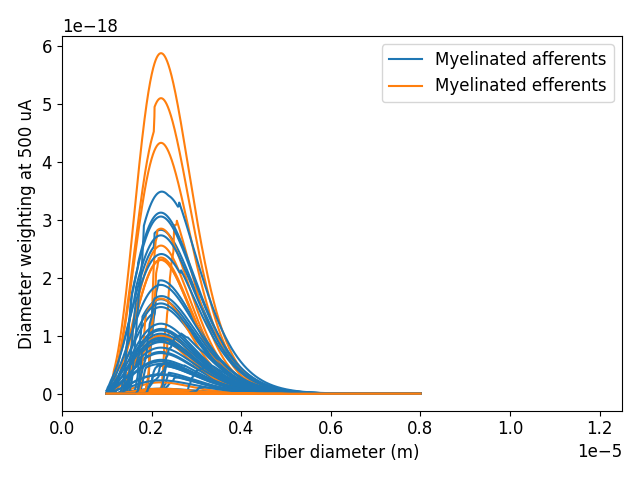

In [34]:
plt.figure()

for i in range(39):
    plt.plot(d,maffWeight[i][:,-1],c='tab:blue')
    plt.plot(d,meffWeight[i][:,-1],c='tab:orange')

plt.xlabel('Fiber diameter (m)')
plt.ylabel('Diameter weighting at 500 uA')
plt.legend(['Myelinated afferents','Myelinated efferents'])
plt.xlim([0,1.25e-5])
plt.tight_layout()

<IPython.core.display.Javascript object>


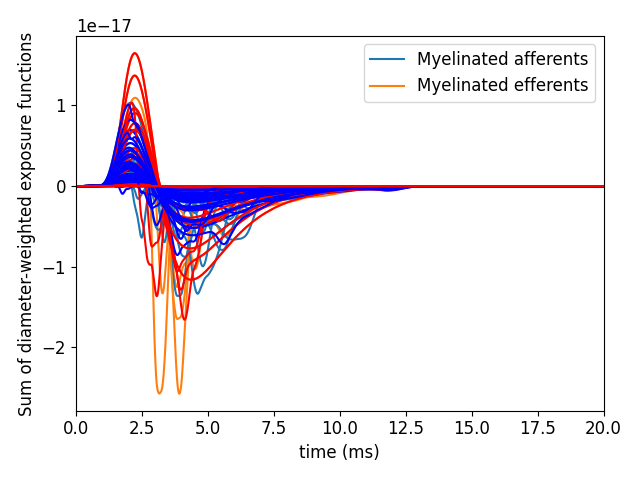

In [35]:
plt.figure()


for i in range(39):
    plt.plot(time*1e3,phiMaff[i][:,-1],c='tab:blue')
    plt.plot(time*1e3,phiMeff[i][:,-1],c='tab:orange')
    
for i in range(39):
    plt.plot(time*1e3,phiMaffS[i][:,-1],c='b')
    plt.plot(time*1e3,phiMeffS[i][:,-1],c='r')
    
plt.xlim([0,0.02*1e3])
plt.xlabel('time (ms)')
plt.ylabel('Sum of diameter-weighted exposure functions')
plt.legend(['Myelinated afferents','Myelinated efferents'])
plt.tight_layout()

In [64]:
totalAll.shape

(39, 5, 499997)

<IPython.core.display.Javascript object>


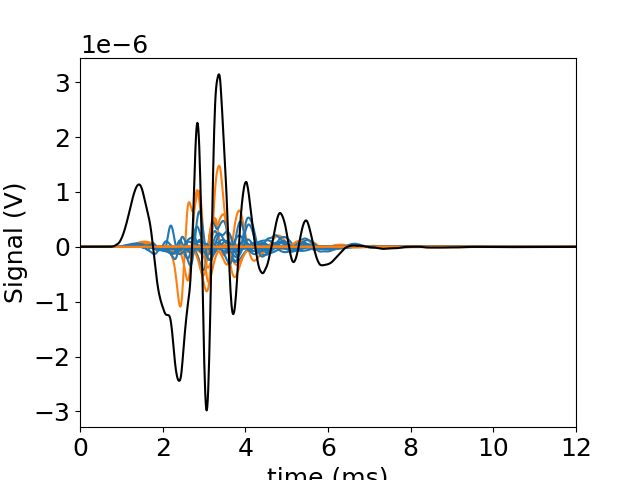

(0.0, 12.0)

In [91]:
plt.figure()

for i in range(39):
    plt.plot(time[1:-1]*1e3,maffAll[i][-1],c='tab:blue')
    plt.plot(time[1:-1]*1e3,meffAll[i][-1],c='tab:orange')
    
plt.plot(time[1:-1]*1e3,np.sum(totalAll,axis=0)[-1],'k')
#plt.plot(time[1:-1]*1e3,np.sum(meffAllS,axis=0)[-1],'r')
#
plt.xlabel('time (ms)')
plt.ylabel('Signal (V)')

plt.xlim([0,0.012*1e3])

<IPython.core.display.Javascript object>


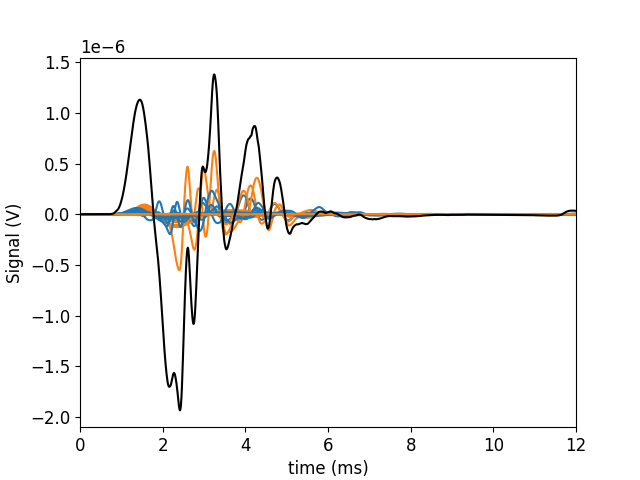

(0.0, 12.0)

In [37]:
plt.figure()

for i in range(39):
    plt.plot(time[1:-1]*1e3,maffAllS[i][-1],c='tab:blue')
    plt.plot(time[1:-1]*1e3,meffAllS[i][-1],c='tab:orange')
    
plt.plot(time[1:-1]*1e3,np.sum(totalAllS,axis=0)[-1],'k')
#plt.plot(time[1:-1]*1e3,np.sum(meffAllS,axis=0)[-1],'r')
#
plt.xlabel('time (ms)')
plt.ylabel('Signal (V)')

plt.xlim([0,0.012*1e3])

In [18]:
bigIdx = np.where(np.max(np.abs(totalAll[:,-1,:]),axis=-1)>2e-6)[0]
smallIdx = np.where(np.max(np.abs(totalAll[:,-1,:]),axis=-1)<2e-6)[0]

bigIdxS = np.where(np.max(np.abs(totalAllS[:,-1,:]),axis=-1)>2e-6)[0]
smallIdxS = np.where(np.max(np.abs(totalAllS[:,-1,:]),axis=-1)<2e-6)[0]

In [19]:
smallIdx = smallIdx[np.argsort(np.max(np.abs(totalAll[smallIdx,-1,:]),axis=-1))]
smallIdxS = smallIdxS[np.argsort(np.max(np.abs(totalAllS[smallIdxS,-1,:]),axis=-1))]

In [20]:
smallIdx

array([35, 36, 33, 30, 21, 32, 12, 28, 10, 24, 14, 23, 20, 27, 29, 19, 34,
       17, 26,  3,  7,  5,  4, 25, 11, 13, 18, 31,  8, 37, 16, 22, 38])

In [21]:
bigIdx = bigIdx[np.argsort(np.max(np.abs(totalAll[bigIdx,-1,:]),axis=-1))]

In [23]:
len(smallIdx)

33

<IPython.core.display.Javascript object>


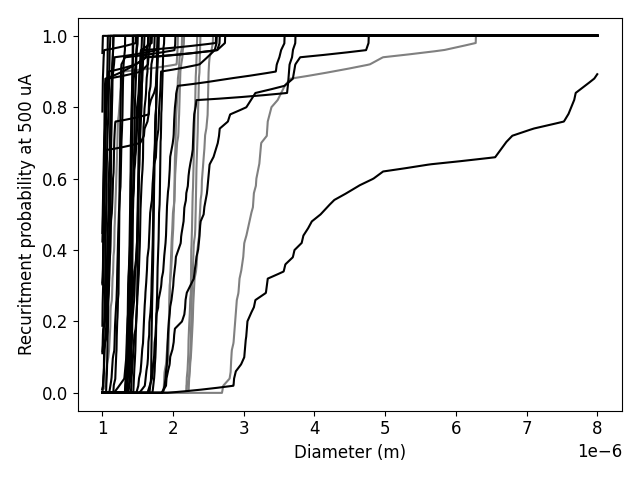

In [62]:
plt.figure()

legend = []

for i in bigIdx:
    plt.plot(d,recruitment[i][-1][0],c='grey')
    

for i in smallIdx:
    plt.plot(d,recruitment[i][-1][0],c='k')
    
plt.xlabel('Diameter (m)')
plt.ylabel('Recuritment probability at 500 uA')
plt.tight_layout()

<IPython.core.display.Javascript object>


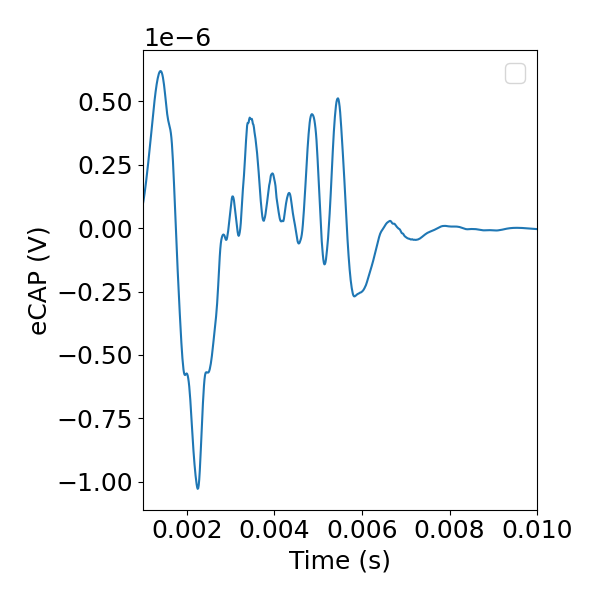

In [40]:
plt.figure(figsize=(6,6))

legend = []

plt.plot(time[1:-1],np.sum(totalAll[smallIdx],axis=0)[-1])
    
#     legend.append('Stimulus '+str( (i+1)*100 ) + ' uA')
    
plt.xlabel('Time (s)')
plt.ylabel('eCAP (V)')

plt.xlim([1e-3,10*1e-3])

plt.tight_layout()

plt.legend(legend)

plt.savefig('figures/signal.png',dpi=300)

<IPython.core.display.Javascript object>


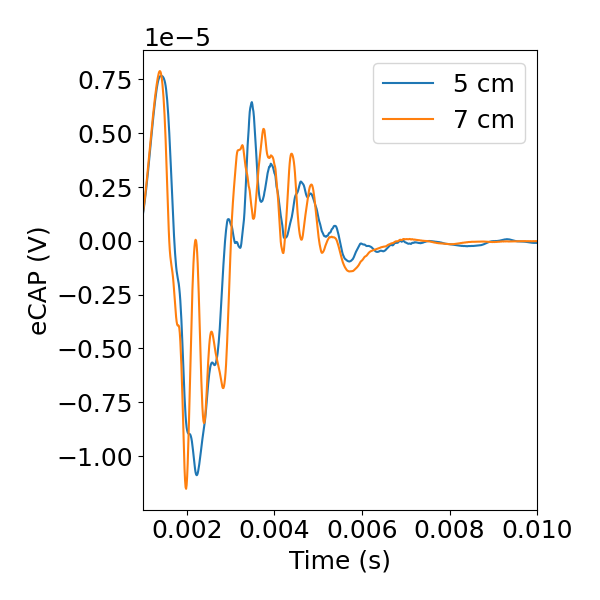

In [24]:
plt.figure(figsize=(6,6))

legend = ['5 cm','7 cm']

plt.plot(time[1:-1],np.sum(totalAll[smallIdx],axis=0)[-1])
plt.plot(time[1:-1],np.sum(totalAllS[smallIdx],axis=0)[-1])
    
#     legend.append('Stimulus '+str( (i+1)*100 ) + ' uA')
    
plt.xlabel('Time (s)')
plt.ylabel('eCAP (V)')

plt.xlim([1e-3,10*1e-3])

plt.tight_layout()

plt.legend(legend)

plt.savefig('figures/signalDistanceDiff.png',dpi=300)

<IPython.core.display.Javascript object>


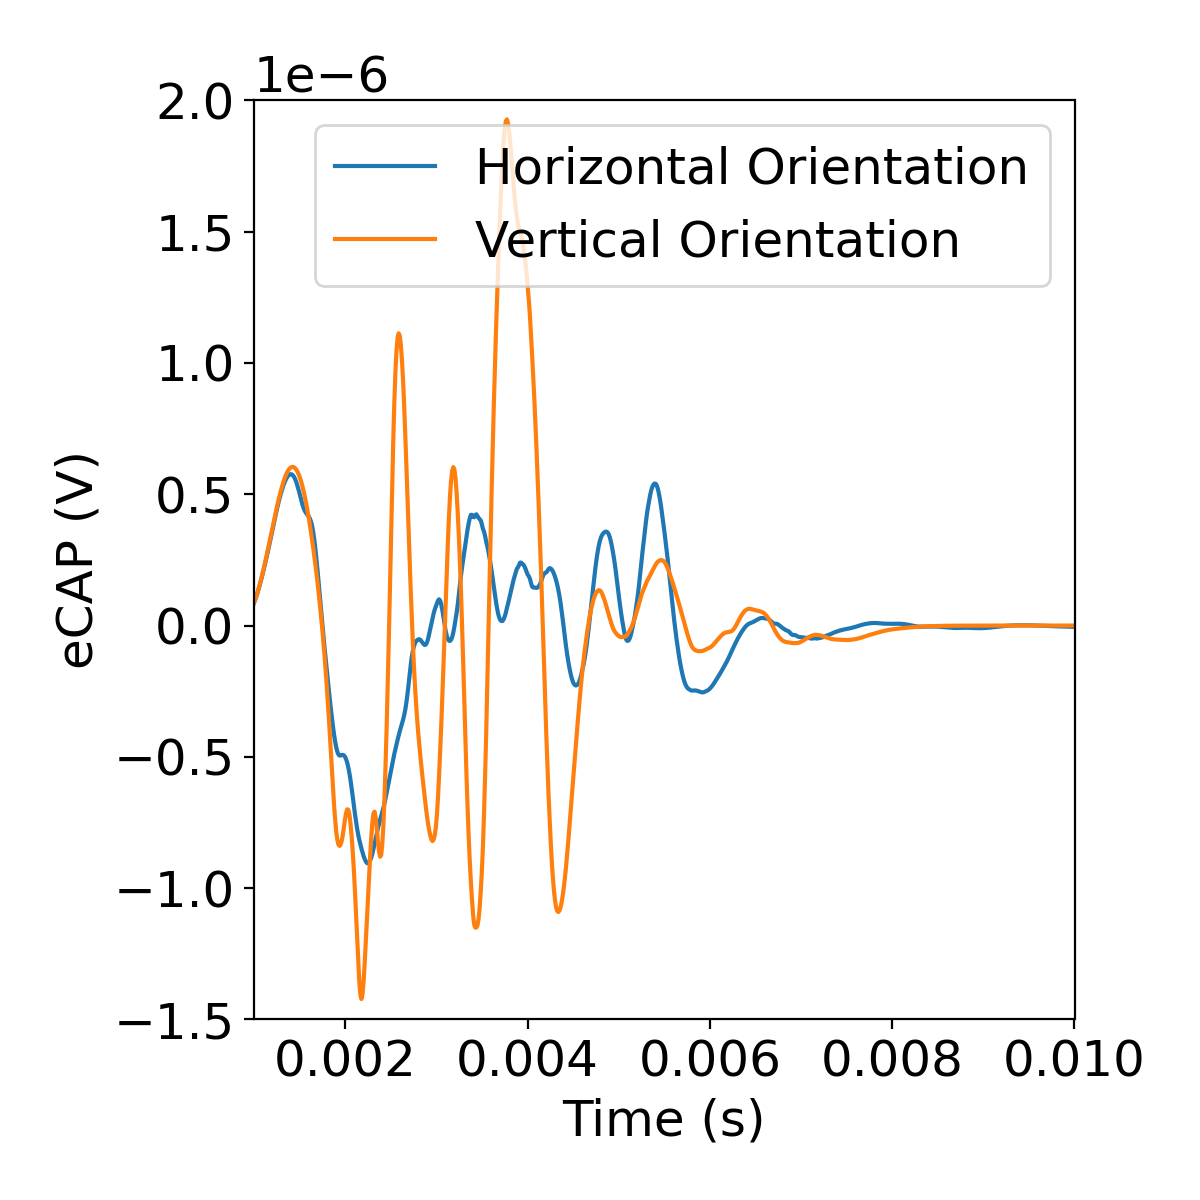

In [27]:
plt.figure(figsize=(6,6))

legend = ['Horizontal Orientation','Vertical Orientation']

# plt.subplot(121)

plt.plot(time[1:-1],np.sum(totalAll[smallIdx],axis=0)[-1])
plt.plot(time[1:-1],np.sum(totalAllS[smallIdx],axis=0)[-1])
        
plt.xlabel('Time (s)')
plt.ylabel('eCAP (V)')

plt.xlim([1e-3,10*1e-3])
plt.ylim([-1.5e-6,2e-6])

plt.tight_layout()

# plt.subplot(122)

# plt.plot(time[1:-1],np.sum(totalAll[smallIdxS],axis=0)[-1])
# plt.plot(time[1:-1],np.sum(totalAllS[smallIdxS],axis=0)[-1])
        
# plt.xlabel('Time (s)')

# plt.xlim([1e-3,10*1e-3])
# plt.ylim([-1.5e-6,2e-6])

# plt.tight_layout()

plt.legend(legend)

plt.savefig('figures/signalOrientationDiff.png',dpi=300)

<IPython.core.display.Javascript object>


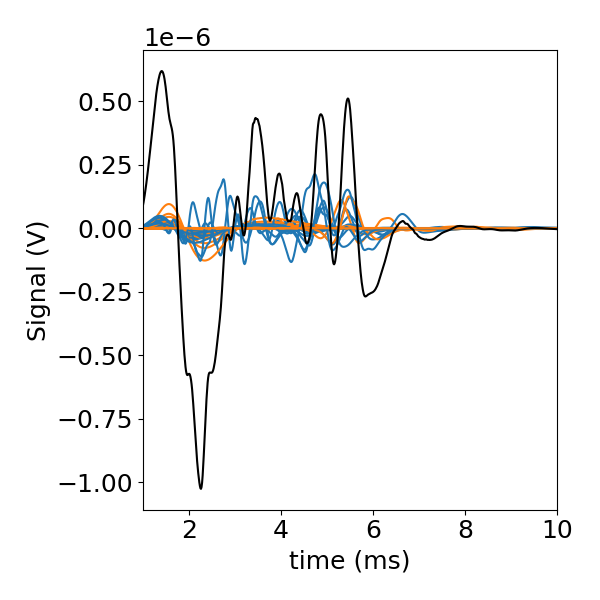

In [98]:
plt.figure(figsize=(6,6))
for i in smallIdx:
    plt.plot(time[1:-1]*1e3,maffAll[i][-1],c='tab:blue')
    plt.plot(time[1:-1]*1e3,meffAll[i][-1],c='tab:orange')
    
plt.plot(time[1:-1]*1e3,np.sum(totalAll[smallIdx],axis=0)[-1],'k')

plt.xlabel('time (ms)')
plt.ylabel('Signal (V)')

plt.xlim([0.001*1e3,0.01*1e3])

plt.tight_layout()

<IPython.core.display.Javascript object>


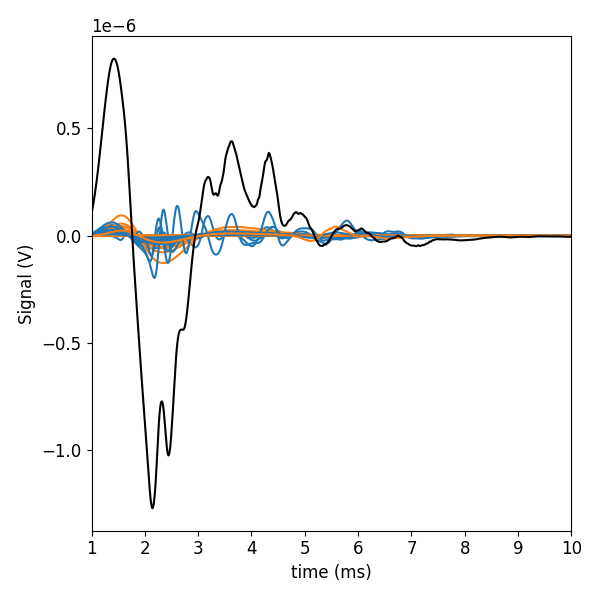

In [64]:
plt.figure(figsize=(6,6))
for i in smallIdx:
    plt.plot(time[1:-1]*1e3,maffAllS[i][-1],c='tab:blue')
    plt.plot(time[1:-1]*1e3,meffAllS[i][-1],c='tab:orange')
    
plt.plot(time[1:-1]*1e3,np.sum(totalAllS[smallIdx],axis=0)[-1],'k')

plt.xlabel('time (ms)')
plt.ylabel('Signal (V)')

plt.xlim([0.001*1e3,0.01*1e3])

plt.tight_layout()

<IPython.core.display.Javascript object>


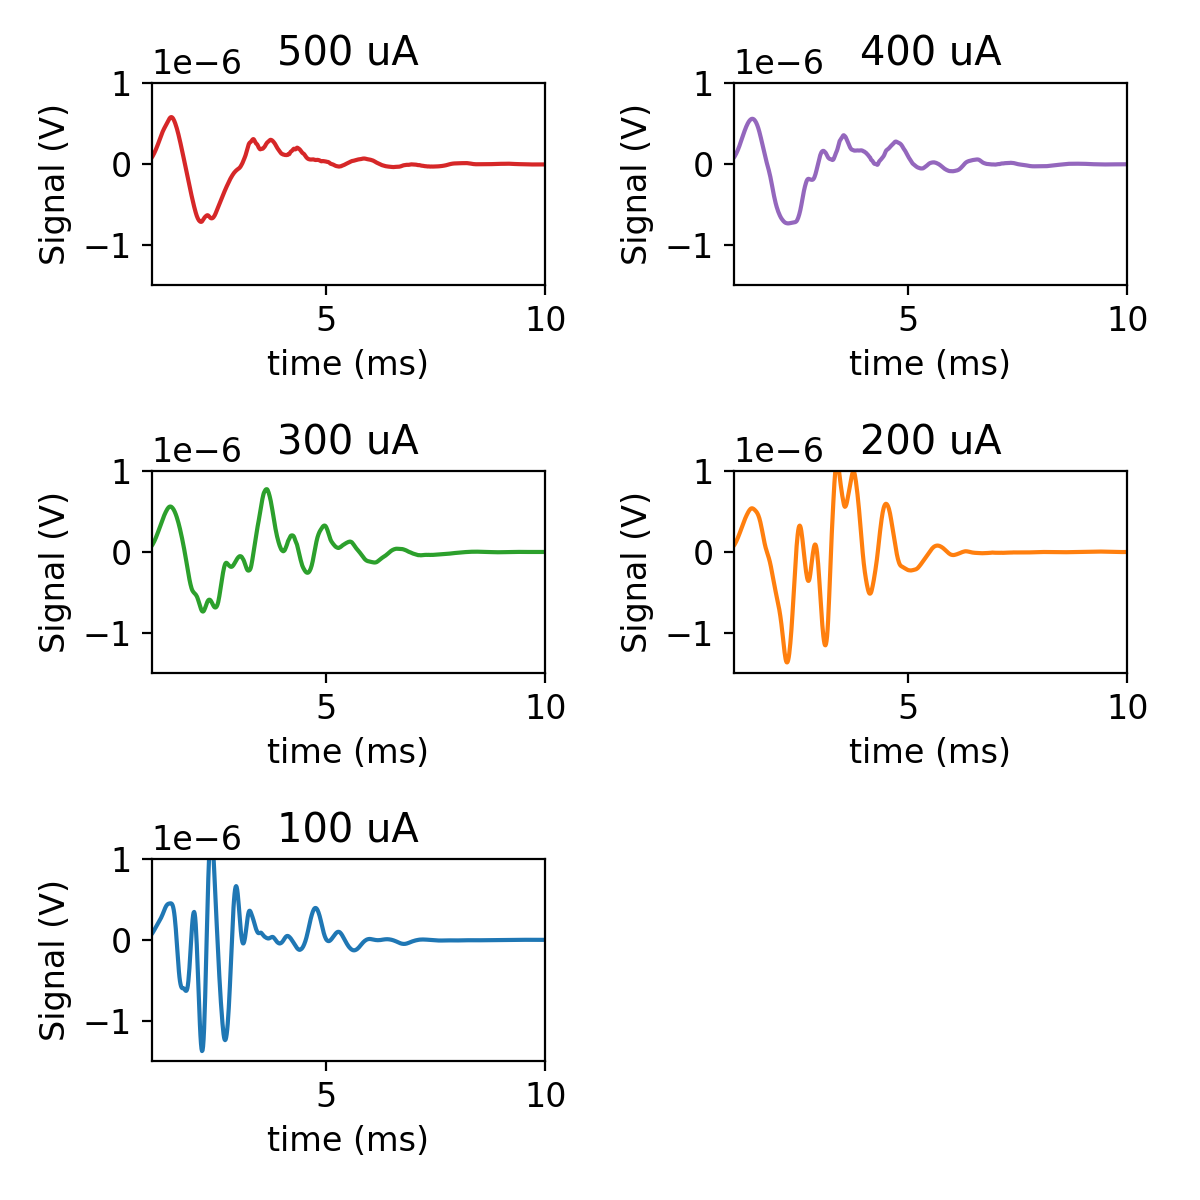

In [61]:
plt.figure(figsize=(6,6))

colors = ['tab:red','tab:purple','tab:green','tab:orange','tab:blue']

amplitudes = ['500 uA','400 uA','300 uA','200 uA','100 uA']

for i in np.arange(1,6):
    
    plt.subplot(3,2,i)
    plt.plot(time[1:-1]*1e3,np.sum(totalAll[smallIdx],axis=0)[-i],c = colors[i-1])

    plt.xlabel('time (ms)')
    plt.ylabel('Signal (V)')

    plt.xlim([0.001*1e3,0.01*1e3])
    plt.ylim([-1.5e-6,1e-6])

    plt.title(amplitudes[i-1])

plt.tight_layout()

In [79]:
i

3

<IPython.core.display.Javascript object>


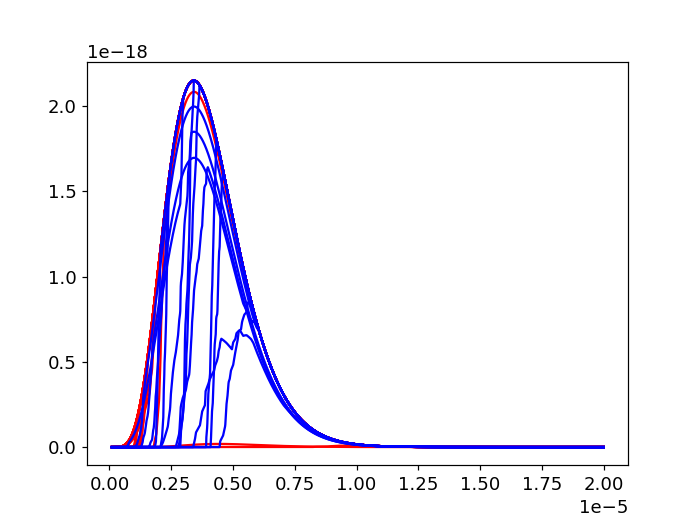

In [58]:
plt.figure()

legend = []

for i in smallIdx:
    plt.plot(d,maffWeight[i][:,-1],c='r')
    
    
for i in bigIdx:
    plt.plot(d,maffWeight[i][:,-1],c='b')
    
# plt.xlim([0,0.02])



<IPython.core.display.Javascript object>


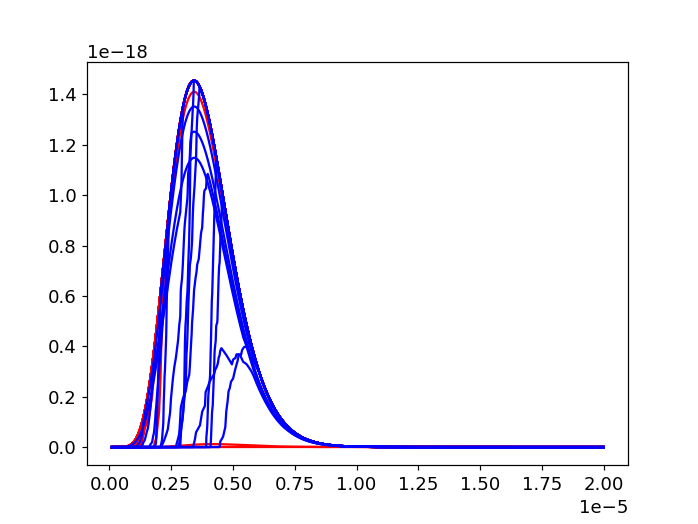

In [59]:
plt.figure()

legend = []

for i in smallIdx:
    plt.plot(d,meffWeight[i][:,-1],c='r')
    
    
for i in bigIdx:
    plt.plot(d,meffWeight[i][:,-1],c='b')
    
# plt.xlim([0,0.02])


In [285]:
d.shape

(2000,)

<IPython.core.display.Javascript object>


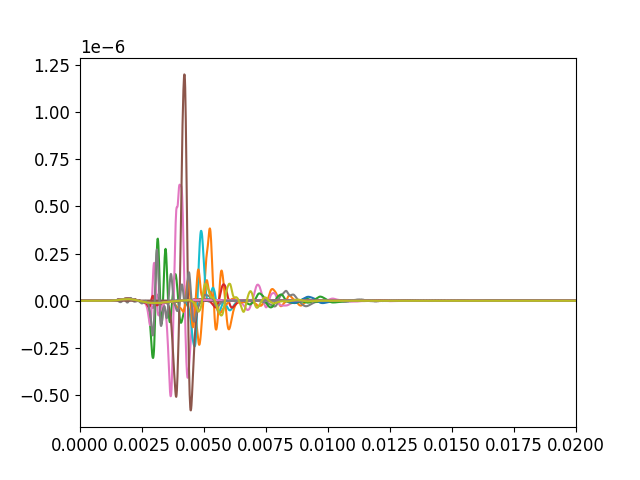

(0.0, 0.02)

In [27]:
plt.figure()
for i in range(39):
    plt.plot(time[1:-1],totalAll[i][-1])
plt.xlim([0,0.02])

<IPython.core.display.Javascript object>


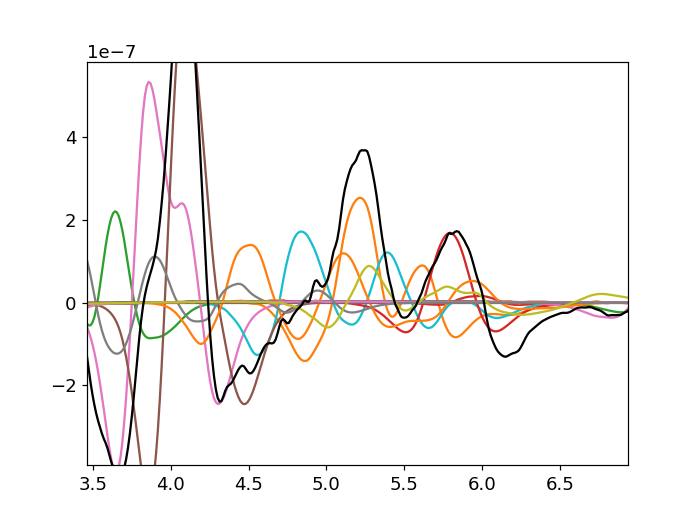

(0.0, 20.0)

In [66]:
plt.figure()
for i in range(39):
    plt.plot(time[1:-1]*1e3,maffAll[i][-1])

plt.plot(time[1:-1]*1e3,np.sum(maffAll,axis=0)[-1],'k')#+np.sum(meffAll,axis=0)[-1],'k')
plt.xlim(np.array([0,0.02])*1e3)

<IPython.core.display.Javascript object>


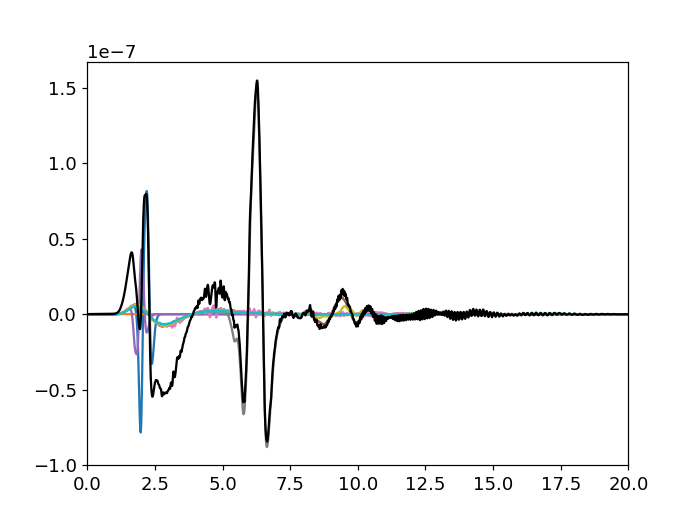

(0.0, 20.0)

In [25]:
plt.figure()
for i in np.arange(5,15):
    plt.plot(time[1:-1]*1e3,maffAll[i][-1])

plt.plot(time[1:-1]*1e3,np.sum(maffAll[5:15],axis=0)[-1],'k')
plt.xlim(np.array([0,0.02])*1e3)

In [198]:
smallIdx = np.where(np.max(np.abs(np.diff(phiMaff[:,:,-1],axis=1)),axis=1)<.5e-19)[0]
bigIdx = np.where(np.max(np.abs(np.diff(phiMaff[:,:,-1],axis=1)),axis=1)>.5e-19)[0]


In [271]:
recruitment = np.array(recruitment)
diamIdx = np.where(d>0.25e-5)[0][0]
diamIdx2 = np.where(d>1.5e-5)[0][0]
smallIdx = np.union1d( np.where(recruitment[:,-1,0,diamIdx]==1)[0], np.where(recruitment[:,-1,0,diamIdx2] < 1)[0] )

In [57]:
len(smallIdx)

25

In [54]:
tIdx = np.where(time[1:-1]*1e3>2.5)[0][0]
closeIdx = np.where(np.argmax(maffAll[:,-1,:],axis=-1)<tIdx)[0]
smallIdx = closeIdx

In [30]:
len(bigIdx)

17

<IPython.core.display.Javascript object>


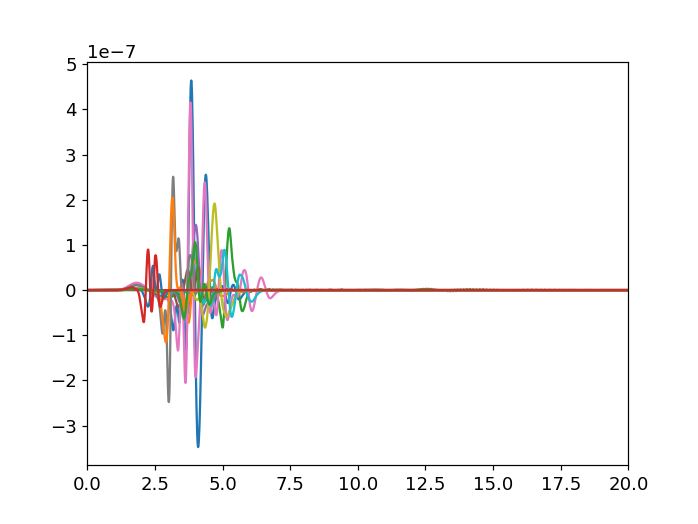

(0.0, 20.0)

In [140]:
plt.figure()
for b in bigIdx:
    plt.plot(time[1:-1]*1e3,maffAll[b,-1])
plt.xlim(np.array([0.0,0.02])*1e3)

<IPython.core.display.Javascript object>


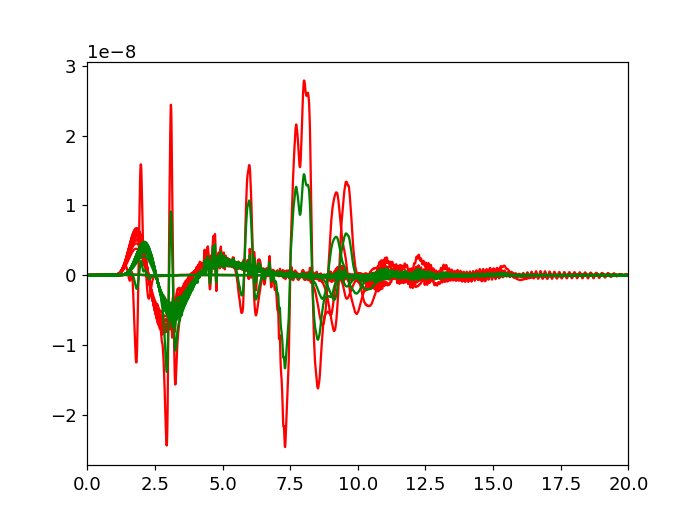

(0.0, 20.0)

In [60]:
plt.figure()
for s in smallIdx:
    plt.plot(time[1:-1]*1e3,maffAll[s,-1],c='r')
    
for s in smallIdx:
    plt.plot(time[1:-1]*1e3,meffAll[s,-1],c='g')
plt.xlim(np.array([0.0,0.02])*1e3)

<IPython.core.display.Javascript object>


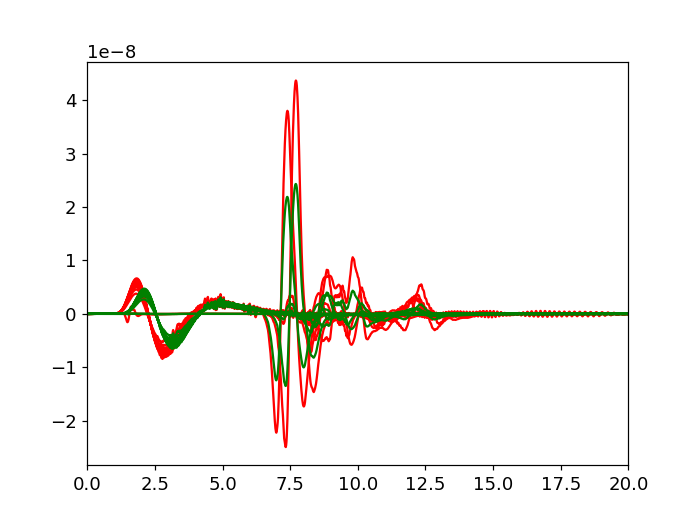

(0.0, 20.0)

In [32]:
plt.figure()
for s in smallIdx:
    plt.plot(time[1:-1]*1e3,maffAll[s,-2],c='r')
    
for s in smallIdx:
    plt.plot(time[1:-1]*1e3,meffAll[s,-2],c='g')
plt.xlim(np.array([0.0,0.02])*1e3)

<IPython.core.display.Javascript object>


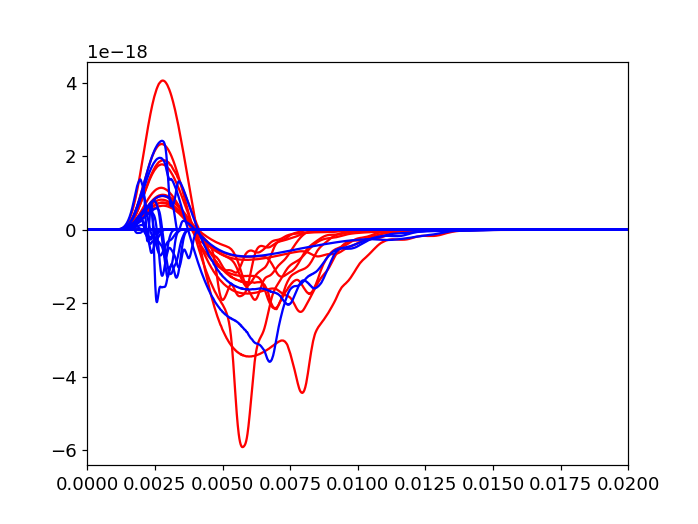

(0.0, 0.02)

In [276]:
plt.figure()

legend = []

for i in smallIdx:
    plt.plot(time,phiMaff[i][:,-3],c='r')
    
for i in bigIdx:
    plt.plot(time,phiMaff[i][:,-3],c='b')
    
plt.xlim([0,0.02])



<IPython.core.display.Javascript object>


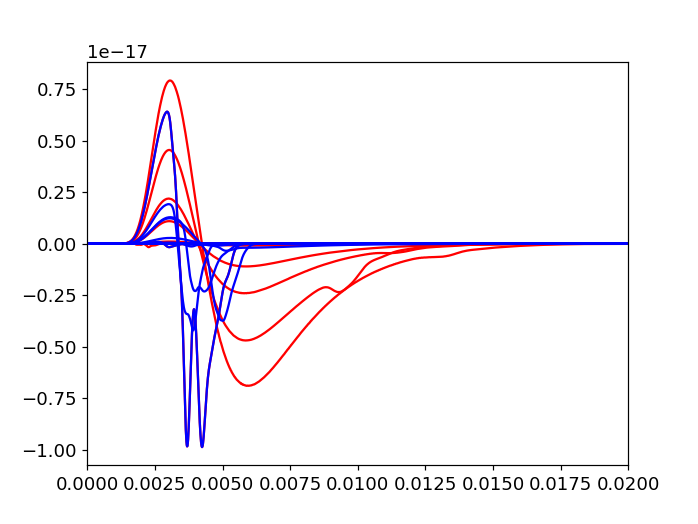

(0.0, 0.02)

In [150]:
plt.figure()

legend = []

for i in smallIdx:
    plt.plot(time,phiMeff[i][:,-1],c='r')
    
for i in bigIdx:
    plt.plot(time,phiMeff[i][:,-1],c='b')
    
plt.xlim([0,0.02])


<IPython.core.display.Javascript object>


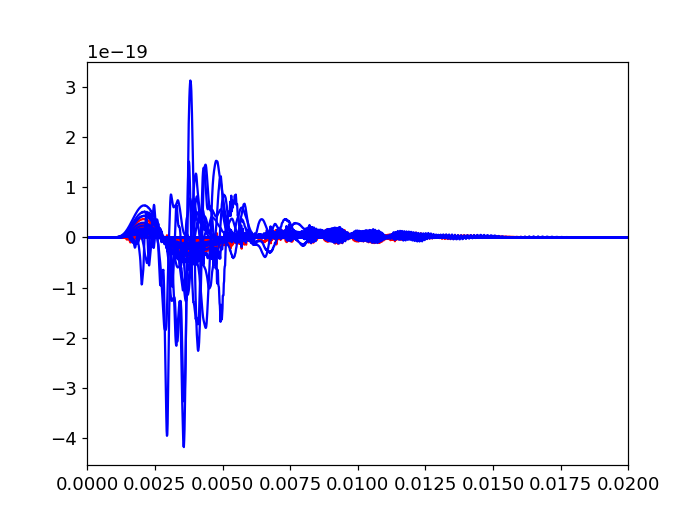

(0.0, 0.02)

In [107]:
plt.figure()

for i in smallIdx:
    plt.plot(time[1:],np.diff(phiMaff[i][:,-1]),c='r')
    
for i in bigIdx:
    plt.plot(time[1:],np.diff(phiMaff[i][:,-1]),c='b')
    
plt.xlim([0,0.02])

In [35]:
bigIdx

array([ 3,  7, 11, 17, 22, 33, 16, 26, 38, 31, 37, 13,  9,  2,  1,  6, 15])

<IPython.core.display.Javascript object>


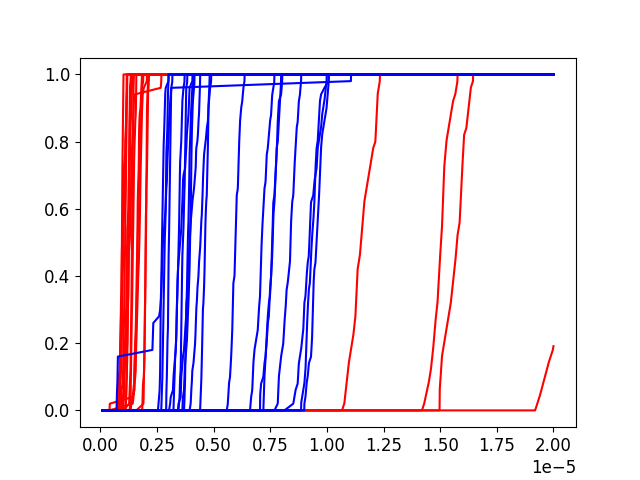

In [25]:
plt.figure()

legend = []

for i in smallIdx:
    plt.plot(d,recruitment[i][-1][0],c='r')
    
for i in bigIdx:
    plt.plot(d,recruitment[i][-1][0],c='b')
    

<IPython.core.display.Javascript object>


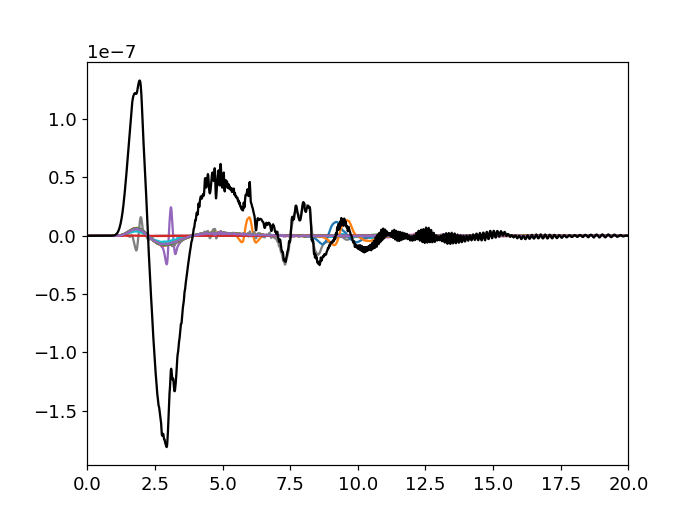

(0.0, 20.0)

In [63]:
plt.figure()
for i in smallIdx:
    plt.plot(time[1:-1]*1e3,maffAll[i][-1])

plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-1],'k')
plt.xlim(np.array([0,0.02])*1e3)

<IPython.core.display.Javascript object>


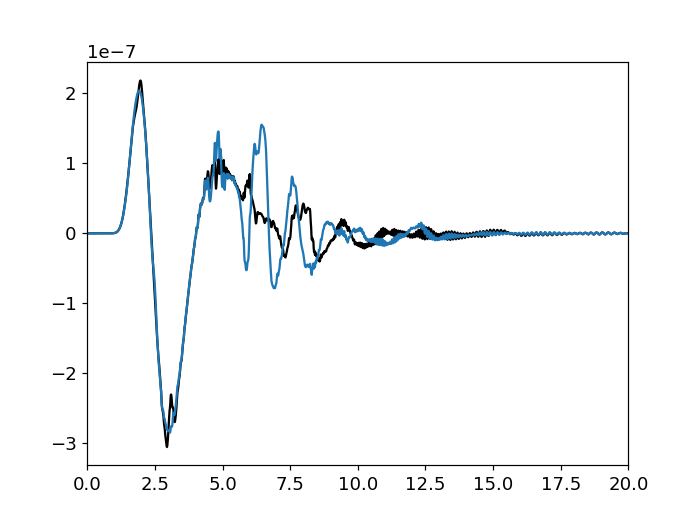

(0.0, 20.0)

In [61]:
plt.figure()


plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-1]+np.sum(meffAll[smallIdx],axis=0)[-1],'k')
plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-2]+np.sum(meffAll[smallIdx],axis=0)[-2])
# plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-3]+np.sum(meffAll[smallIdx],axis=0)[-3])
# plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-4]+np.sum(meffAll[smallIdx],axis=0)[-4])


plt.xlim(np.array([0,0.02])*1e3)

In [38]:
len(bigIdx)

23

<IPython.core.display.Javascript object>


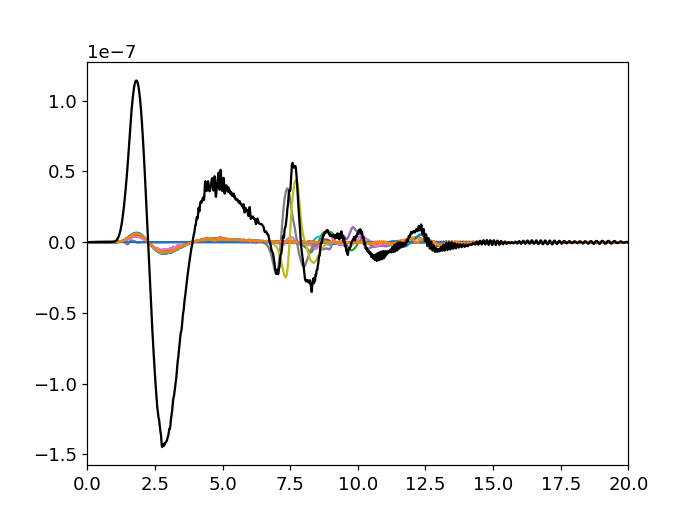

(0.0, 20.0)

In [38]:
plt.figure()
for i in smallIdx:
    plt.plot(time[1:-1]*1e3,maffAll[i][-2])

plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-2],'k')
plt.xlim(np.array([0,0.02])*1e3)

<IPython.core.display.Javascript object>


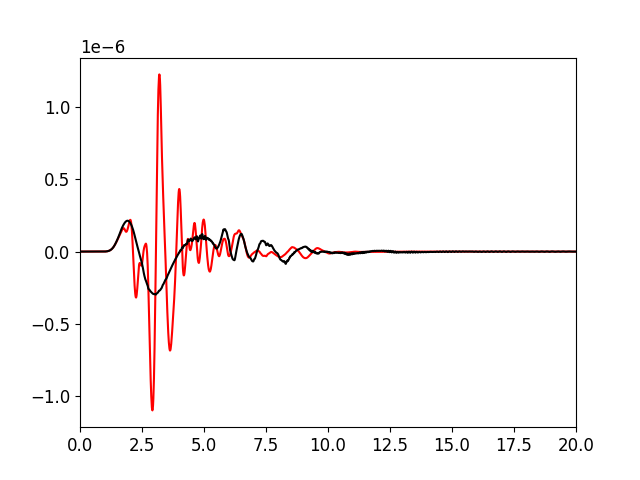

(0.0, 20.0)

In [41]:
plt.figure()

plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[0]+np.sum(meffAll[smallIdx],axis=0)[0],'r')

plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-2]+np.sum(meffAll[smallIdx],axis=0)[-2],'k')
plt.xlim(np.array([0,0.02])*1e3)

In [45]:
len(bigIdx)

23

<IPython.core.display.Javascript object>


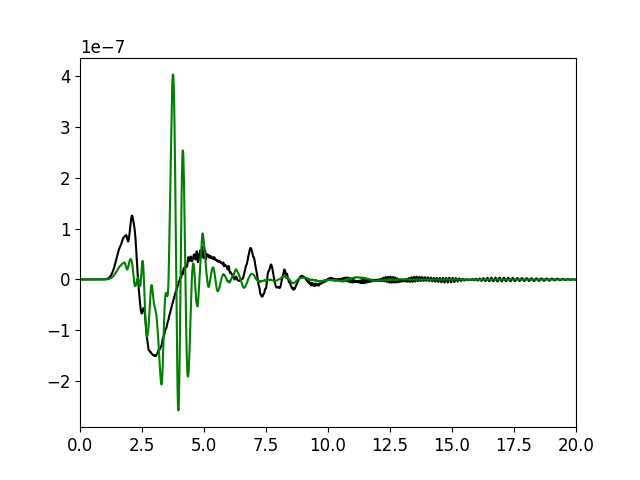

(0.0, 20.0)

In [28]:
plt.figure()


plt.plot(time[1:-1]*1e3,np.sum(maffAll[smallIdx],axis=0)[-1]+np.sum(meffAll[smallIdx],axis=0)[-1],'k')
plt.plot(time[1:-1]*1e3,np.sum(maffAll[bigIdx[:5]],axis=0)[-1]+np.sum(meffAll[bigIdx[:5]],axis=0)[-1],'g')

plt.xlim(np.array([0,0.02])*1e3)

<IPython.core.display.Javascript object>


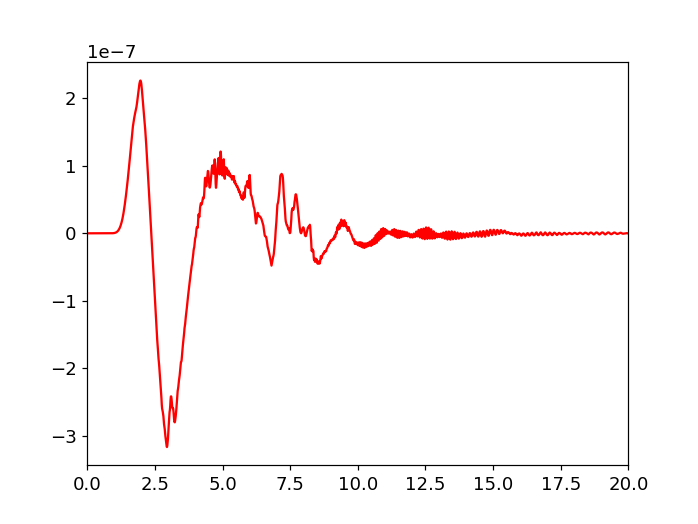

(0.0, 20.0)

In [78]:
plt.figure()
plt.plot(time[1:-1]*1e3,np.sum(totalAll[smallIdx],axis=0)[-1]+np.sum(totalAll[bigIdx[6:7]],axis=0)[-1],'r')
# plt.plot(time[1:-1]*1e3,np.sum(totalAll[smallIdx],axis=0)[-2]+np.sum(totalAll[bigIdx[:10]],axis=0)[-2],'b')
plt.xlim(np.array([0,0.02])*1e3)

In [39]:
from scipy.signal import butter,sosfilt,sosfiltfilt

sos = butter(5,500,fs=nx/(time_max-time_min),output='sos')
sig = sosfiltfilt(sos,np.sum(totalAll,axis=0),axis=-1)


<IPython.core.display.Javascript object>


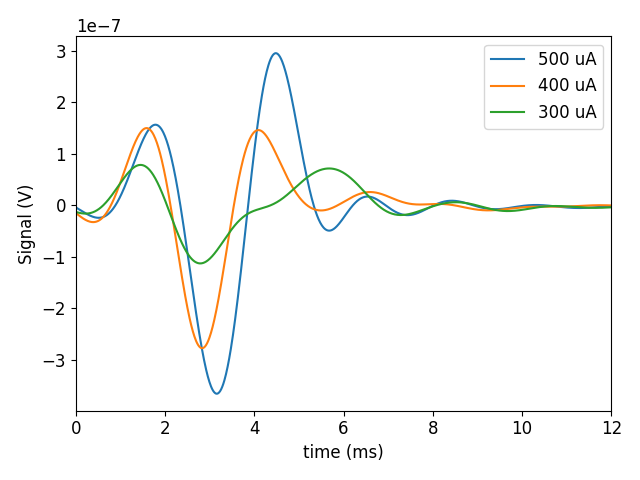

In [43]:
plt.figure()
plt.plot(time[1:-1]*1e3,sig[-1])
plt.plot(time[1:-1]*1e3,sig[-2])
plt.plot(time[1:-1]*1e3,sig[-3])
plt.xlim(np.array([0,0.012])*1e3)
plt.xlabel('time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['500 uA','400 uA','300 uA'])
plt.tight_layout()

<IPython.core.display.Javascript object>


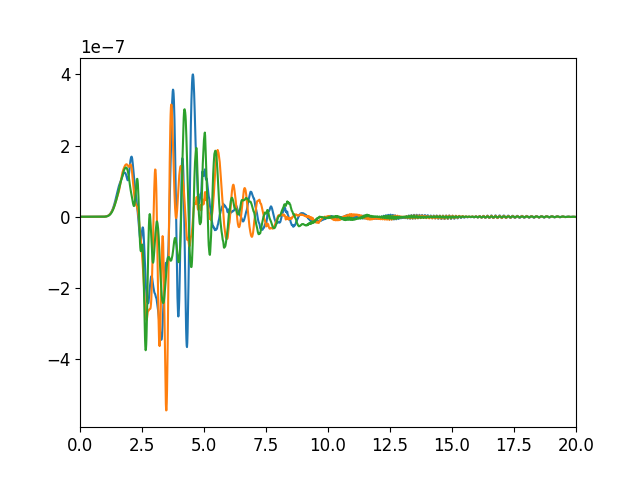

(0.0, 20.0)

In [32]:
plt.figure()
plt.plot(time[1:-1]*1e3,np.sum(totalAll,axis=0)[-1])
plt.plot(time[1:-1]*1e3,np.sum(totalAll,axis=0)[-2])
plt.plot(time[1:-1]*1e3,np.sum(totalAll,axis=0)[-3])

plt.xlim(np.array([0,0.02])*1e3)

/gpfs/bbp.cscs.ch/home/tharayil/bluepy-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


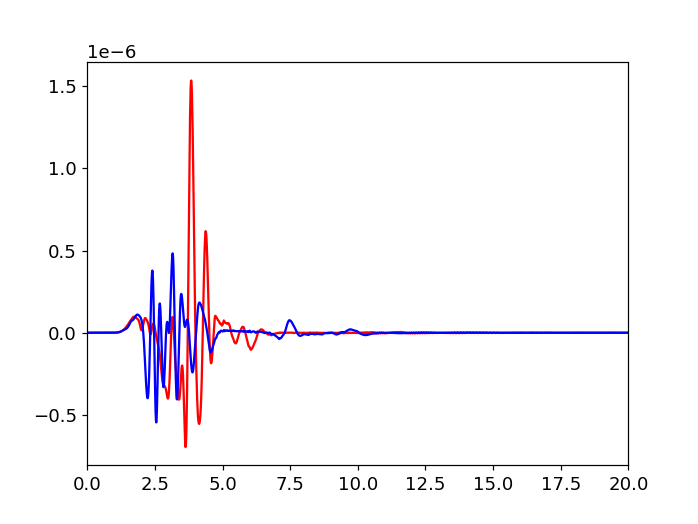

(0.0, 20.0)

In [364]:
plt.figure()
plt.plot(time[1:-1]*1e3,np.sum(totalAll[bigIdx],axis=0)[-1],'r')
plt.plot(time[1:-1]*1e3,np.sum(totalAllL[bigIdx],axis=0)[-1],'b')
plt.xlim(np.array([0,0.02])*1e3)

<IPython.core.display.Javascript object>


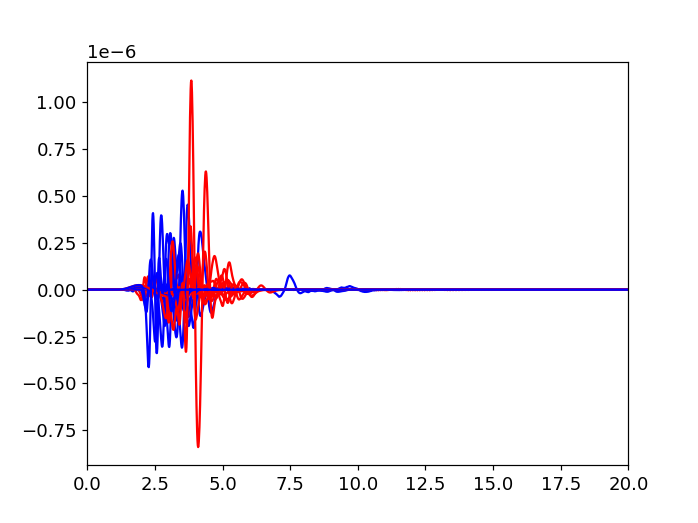

(0.0, 20.0)

In [340]:
plt.figure()
for b in bigIdx:
    plt.plot(time[1:-1]*1e3,totalAll[b][-1],'r')
    plt.plot(time[1:-1]*1e3,totalAllL[b][-1],'b')
plt.xlim(np.array([0,0.02])*1e3)

In [334]:
bigIdx

array([29, 33, 24, 12,  3, 38, 32, 15,  4,  7, 36, 26, 30, 16, 34, 22,  0])